# Homework 9

## Name: 


# Problem 1: fitting functions and finding extrema (50P)

**A (5P)**

In this task, we are going to work again with the function we already used in homework 3:

<center> $f(x) = (x-6)^2$

Use this function to generate an array **f1** that contains values for the **negative** function **-f(x)** on the interval: 
   
<center> $x \in [0,20]$

The **x-interval** must be devided into **10 equal steps**!

In [65]:
import numpy as np

def f(x):
    f = (x-6)**2
    return f

x = np.linspace(0,20,10)

f1 = -f(x)

f1

array([ -36.        ,  -14.27160494,   -2.41975309,   -0.44444444,
         -8.34567901,  -26.12345679,  -53.77777778,  -91.30864198,
       -138.71604938, -196.        ])

**B (5P)**

Create a scatter plot that shows the array f1!

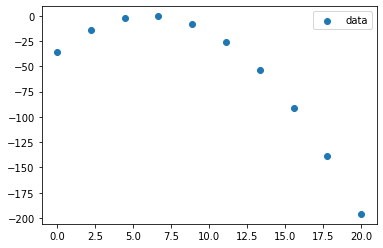

In [66]:
import matplotlib.pyplot as plt

plt.scatter(x,f1, label='data')
plt.legend()
plt.show()

**C (25P)**

Now, we want to fit f1 values with a function. Fit a model function 

<center> $g(x) = m(x-a)^2 + b$
    
where **m,a,b** are the fitting parameters

Print the parameter values with their errors. 
    
Use significant decimals as you have learned in the "Grundpraktikum"! 

**(Hint: the errors can be very small)**

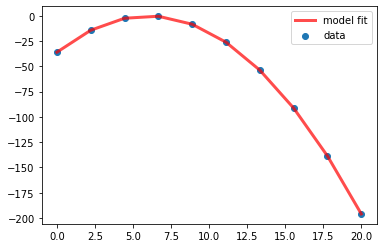

m = -1.0000000008 ± 0.0000000005
a = 6.0000000017 ± 0.0000000029
b = 0.000000076 ± 0.000000006


In [67]:
import scipy.optimize as opt

def model(x, m, a, b):
    y = m*(x-a)**2 + b 
    return y

parameters, covariance = opt.curve_fit(model, x, f1)

fitted_m, fitted_a, fitted_b = parameters

perr = np.sqrt(np.diag(covariance))

fit_y = model(x, fitted_m, fitted_a, fitted_b)
plt.scatter(x, f1, label='data')
plt.plot(x, fit_y, '-', label='model fit', color='r', lw=3,alpha=0.7)
plt.legend()
plt.show()

print("m = {:.10f} ± {:.10f}".format(fitted_m, perr[0]))
print("a = {:.10f} ± {:.10f}".format(fitted_a, perr[1]))
print("b = {:.9f} ± {:.9f}".format(fitted_b, perr[2]))


**D (15P)**

After fitting the function, we want to find the maximum of the fitted curve. **You have to use ```scipy``` for this task!**

Plot f1 again and mark the maximum!

     fun: -7.574412355037558e-08
    nfev: 10
     nit: 4
 success: True
       x: 6.000000001704543


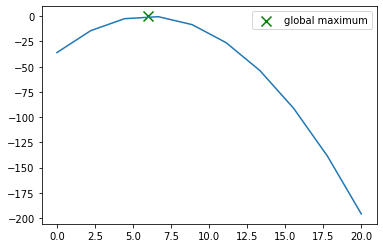

In [68]:
sol = opt.minimize_scalar(lambda x : -model(x, fitted_m, fitted_a, fitted_b))

print(sol)

plt.plot(x, f1)
plt.scatter([sol.x], [sol.fun], marker='x', s=100, c='green',label='global maximum')
plt.legend()
plt.show()

# Problem 2: CERN physicist for an hour

Phi mesons, $\phi$(1020), are registered by their decays into two kaons.

$$\phi \rightarrow K^- K^+$$

In this task, you fit pseudo-data to find the mass of phi meson and its lifetime.

The decay of short living particles, such as phi mesons, is described by Breit-Wigner formula:

$$f(m) = A \frac{m \cdot m_\phi \Gamma_\phi(m)}{(m^2 - m^2_\phi)^2 + m^2_\phi \Gamma^2_\phi(m)}$$

where 

$$\Gamma_\phi = \frac{m_\phi}{m} \Gamma_0 \left (\frac{p}{p_0}\right )^3$$

$$p = \sqrt{\left (\frac{m}{2}\right)^2 - m_K^2}$$

$$p_0 = \sqrt{\left (\frac{m_\phi}{2}\right)^2 - m_K^2}$$

where 
$m_K$ = 494 MeV, kaon mass

$m$ - center-of-mass energy that produces $\phi$ meson

$A$ - normalization factor that is equal to the area under the curve,

$m_\phi$ - phi meson mass,

$\Gamma_0$ - phi meson decay width. 

$A$, $m_\phi$ and $\Gamma_0$ are model parameters that describe peak.


### (A).  Check the given data  (5 P)

You have are provided with two arrays cointaining information about center-of-mass energies and counts (which can be proportional to physical quantities like cross-section). Make a quick plot to check the data (but don't forget about axis labels and specifying energy units)


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [48]:
m = np.asarray([ 990.28571429,  992.57142857,  994.85714286,
        997.14285714,  999.42857143, 1001.71428571, 1004.        ,
       1006.28571429, 1008.57142857, 1010.85714286, 1013.14285714,
       1015.42857143, 1017.71428571, 1020.        , 1022.28571429,
       1024.57142857, 1026.85714286, 1029.14285714, 1031.42857143,
       1033.71428571, 1036.        , 1038.28571429, 1040.57142857,
       1042.85714286, 1045.14285714, 1047.42857143, 1049.71428571,
       1052.        , 1054.28571429, 1056.57142857, 1058.85714286,
       1061.14285714, 1063.42857143, 1065.71428571, 1068.        ,
       1070.28571429, 1072.57142857, 1074.85714286, 1077.14285714,
       1079.42857143, 1081.71428571, 1084.        , 1086.28571429,
       1088.57142857, 1090.85714286, 1093.14285714, 1095.42857143,
       1097.71428571, 1100.        ]) # MeV

counts = np.asarray([2.31003417e-02, 7.66381726e-02, 1.67455262e-01,
       3.11741087e-01, 5.37405428e-01, 8.93031098e-01, 1.46719670e+00,
       2.43247872e+00, 4.15598459e+00, 7.51568994e+00, 1.49749055e+01,
       3.51070312e+01, 1.03632842e+02, 2.16252822e+02, 1.04639025e+02,
       4.59616350e+01, 2.54388979e+01, 1.64404712e+01, 1.17257576e+01,
       8.93503238e+00, 7.13459944e+00, 5.89708248e+00, 5.00438128e+00,
       4.33551917e+00, 3.81884184e+00, 3.40960414e+00, 3.07862337e+00,
       2.80616244e+00, 2.57845502e+00, 2.38564205e+00, 2.22049899e+00,
       2.07762447e+00, 1.95290808e+00, 1.84317215e+00, 1.74592527e+00,
       1.65918918e+00, 1.58137500e+00, 1.51119320e+00, 1.44758725e+00,
       1.38968394e+00, 1.33675579e+00, 1.28819224e+00, 1.24347735e+00,
       1.20217236e+00, 1.16390196e+00, 1.12834334e+00, 1.09521741e+00,
       1.06428173e+00, 1.03532473e+00])  # in units of 1

Text(0, 0.5, 'Counts')

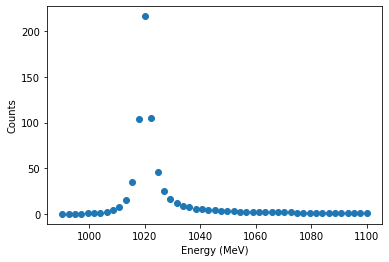

In [49]:
# your code here
plt.scatter(m, counts)
plt.xlabel("Energy (MeV)")
plt.ylabel("Counts")

### (B) Breit - Wigner distribution (12 P)

Write a function that takes center-of-mass energy and model parameters (A, $m_\phi$, $\Gamma_0$) and returns value of $f(E)$ from the formula above. 

As many things in physics, Breit-Wigner distribution is not a trivial or simple function and depends on many factors which in turn are some functions of particle masses/energies. **Implement the Breit-Wigner formula carefully and double check the correspondance between written formulas and your code!**

In [50]:
# @np.vectorize
def BW(m,A,m0,Gamma0):
    mK = 494
    p = ((m/2)**2 - mK**2)**0.5
    p0 = ((m0/2)**2 - mK**2)**0.5
    Gamma = m0/m * Gamma0* (p/p0)**3
    return A*m*m0*Gamma/((m**2-m0**2)**2 + m0**2*Gamma**2)

### (C)  Fit the data (18 P)

Using ```scipy```, fit the data with the Breit-Wigner distribution. Since the parameters of the model differ even in orders of magnitude, it is required to give a starting point for a successfull fit.


Make an _educated guess_ of where approximately the parameters may be if you know that $A$ is an area under the curve, $m_\phi$ is the location of the peak, and $\Gamma_0$ is the width of the peak.

Print the obtined parameters with their units round to two decimal points.

In [57]:
parameters, covariance = opt.curve_fit(BW, m, counts, p0=[500,1000,50])

A_fit, mphi_fit, Gamma0_fit = parameters

print(f"A: {A_fit:.2f}")
print(f"Phi meson mass: {mphi_fit:.2f} MeV")
print(f"Phi meson deay width: {Gamma0_fit:.2f} MeV")

A: 958.00
Phi meson mass: 1020.00 MeV
Phi meson deay width: 4.43 MeV


<ipython-input-50-cd7205de99c3>:5: RuntimeWarning: invalid value encountered in double_scalars
  p0 = ((m0/2)**2 - mK**2)**0.5


### (D). Plot the fit (10 P)

You have obtained the values of Breit-Wigner distribution that describe the given data. Plot the data together with its fit. 

The plot should contain all necessary scientific information to be presented e.g. at the conference.

Text(0, 0.5, 'Counts')

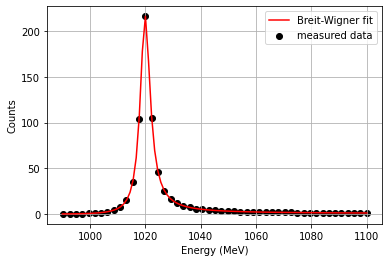

In [64]:
fit_x = np.linspace(990,1100,100)
fit_y = np.vectorize(BW)(fit_x,A_fit,mphi_fit,Gamma0_fit)

plt.scatter(m, counts, color='k',label='measured data')
plt.plot(fit_x, fit_y,color='r', label = 'Breit-Wigner fit')
plt.grid()
plt.legend()
plt.xlabel("Energy (MeV)")
plt.ylabel("Counts")

### (E). Comparing to the previously measured values ( 1 + 4 P)

Particle Data Group provides avarage value of the mass of $\phi$ meson as

$$m_\phi = 1019.455 \; \pm 0.020 \; \textrm{MeV}$$

Compare this to the corresponding parameter of your fit.

In [55]:
# your comment about comparison here
print(f"{mphi_fit:.2f}")
# The obtained fit value is close to the PDG value

1020.00


Lifetime of a particle is another important characteristics alongside its mass. The lifetime is connected to the particle decay width (same as one of the model parameters) as

$$\Gamma = \hbar/\tau$$

where $\hbar = \frac{h}{2\pi}$ is Dirac constant.

Calculate lifetime of $\phi$ meson and compare it to the mean value of previous measuments which is $1.55 \pm 0.01 \times 10^{-22}$ s.

_Don't forget that your decay width has units of MeV!_

In [47]:
# your code here

tau = 6.582e-16/(fitted_Gamma0*1e6) 
print(tau)

# the calculated value is close to the mean value of previous measurments

1.5450704225352234e-22
